In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('gene_expression.csv')
data.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [38]:
data.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


In [39]:
data['Cancer Present'].value_counts()

Cancer Present
1    1500
0    1500
Name: count, dtype: int64

<Axes: xlabel='Gene Two', ylabel='Gene One'>

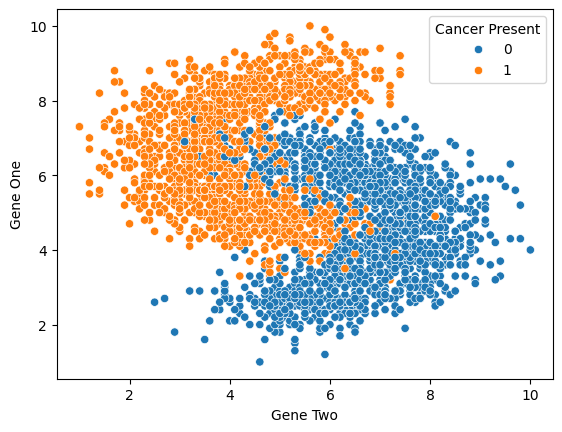

In [40]:
sns.scatterplot(data=data,x='Gene Two',y='Gene One',hue='Cancer Present')

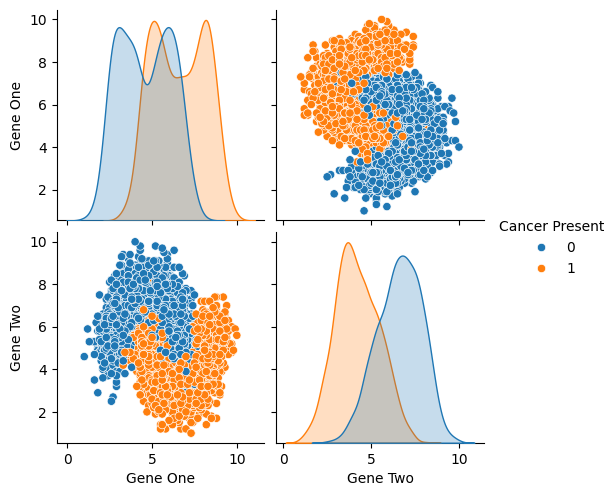

In [41]:
sns.pairplot(data=data,hue='Cancer Present')

In [43]:
X = data.drop('Cancer Present',axis=1)
y = data['Cancer Present']

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [61]:
param_grid = {'n_neighbors': np.arange(1, 31)}
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [62]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [63]:
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best Number of K : {best_n_neighbors}")

Best Number of K : 20


In [64]:
y_pred = grid_search.predict(X_test)

In [65]:
grid_search.score(X_test,y_test)

0.9383333333333334

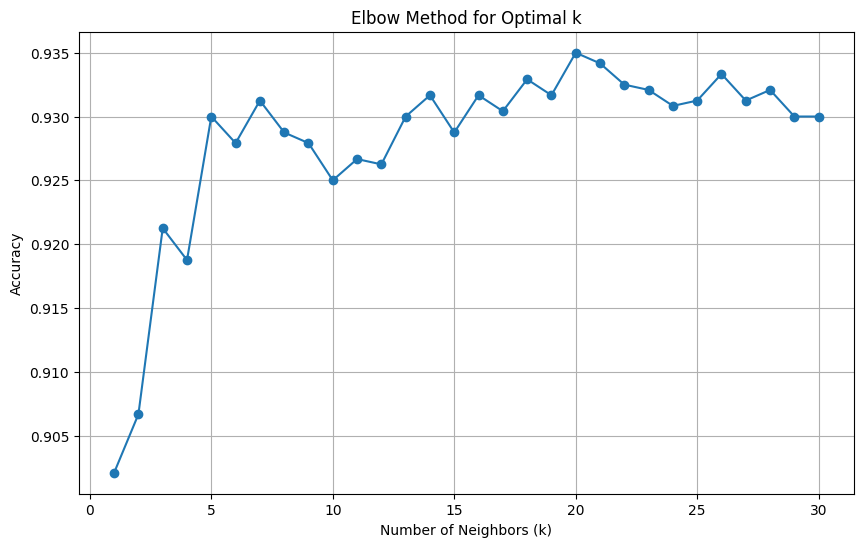

In [70]:
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(param_grid['n_neighbors'], mean_test_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [77]:
best_knn = grid_search.best_estimator_
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with best k: {accuracy:.2f}")

Test set accuracy with best k: 0.94
